CST 395 - Neural Networks and Deep Learning - Assignment 1

    Submitted by: Divina Josy
    S5 CSE
    Roll no. 28
    TVE19CS028

## Import Libraries

We load the necessary libraries from  the end-to-end open source Machine Learning framework, Tensorflow

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

Load MNIST handwritten digit data as well

In [41]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Display Dataset

We show some images from the dataset

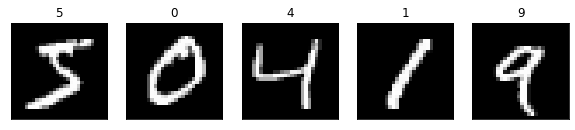

In [42]:
fig, axes = plt.subplots(ncols=5, sharex=False,
			 sharey=True, figsize=(10, 4))
for i in range(5):
	axes[i].set_title(y_train[i])
	axes[i].imshow(X_train[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

## Reshape Dataset

Convert y_train and y_test into one-hot format

In [43]:
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
    
y_train = np.array(temp)

In [44]:
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))

y_test = np.array(temp)

## Define a function to plot the Accuracy VS Epoch graphs

In [45]:
def plot(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

## Create the Neural Network Models

### Model 1

 Create simple Neural Network model 1

In [46]:
model1 = Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.summary()

model1.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Train the Neural Network model 1

In [47]:
history = model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test,y_test), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.6147 - acc: 0.8590 - val_loss: 0.5987 - val_acc: 0.8768
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4153 - acc: 0.9068 - val_loss: 0.4717 - val_acc: 0.9024
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3048 - acc: 0.9245 - val_loss: 0.3655 - val_acc: 0.9183
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2605 - acc: 0.9347 - val_loss: 0.2784 - val_acc: 0.9432
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2344 - acc: 0.9418 - val_loss: 0.3513 - val_acc: 0.9271
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2210 - acc: 0.9452 - val_loss: 0.3145 - val_acc: 0.9374
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2053 - acc: 0.9492 - val_loss: 0.2851 - val_acc: 0.9480
Epoch 8/10
1875/1875 [==============================] - 5s 2ms

Making predictions using our trained model

In [48]:
predictions = model1.predict(X_test)
predictions = np.argmax(predictions, axis=1)

Display some predictions on test data

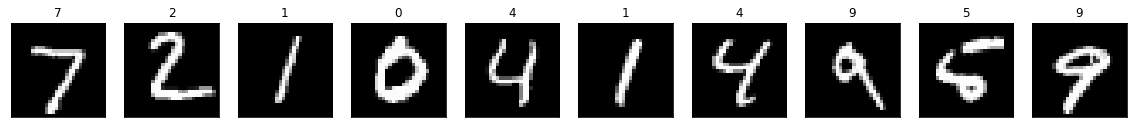

In [49]:
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

Plot accuracy vs epoch chart for Model 1

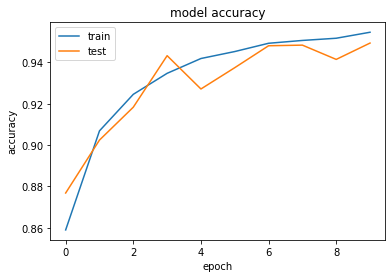

In [50]:
plot(history)

### Model 2

 Create simple Neural Network model 2

In [51]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(89, activation='relu'))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

model2.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 89)                11481     
                                                                 
 dense_6 (Dense)             (None, 50)                4500      
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
Total params: 116,971
Trainable params: 116,971
Non-trainable params: 0
_________________________________________________________________


Train the Neural Network model 2

In [52]:
history = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test,y_test), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9103 - acc: 0.8701 - val_loss: 0.2766 - val_acc: 0.9232
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2196 - acc: 0.9392 - val_loss: 0.1873 - val_acc: 0.9466
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1644 - acc: 0.9532 - val_loss: 0.1707 - val_acc: 0.9548
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1373 - acc: 0.9589 - val_loss: 0.1493 - val_acc: 0.9604
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1182 - acc: 0.9661 - val_loss: 0.1384 - val_acc: 0.9631
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1002 - acc: 0.9707 - val_loss: 0.1362 - val_acc: 0.9632
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0866 - acc: 0.9751 - val_loss: 0.1123 - val_acc: 0.9699
Epoch 8/10
1875/1875 [==============================] - 6s 3ms

Making predictions using our trained model 2

In [53]:
predictions = model2.predict(X_test)
predictions = np.argmax(predictions, axis=1)

Display some predictions on test data

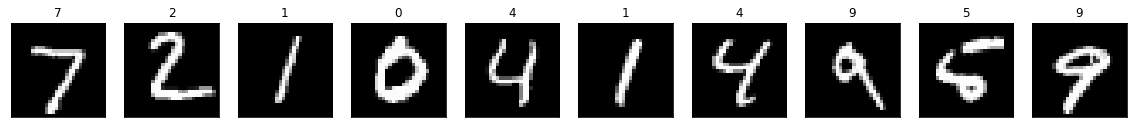

In [54]:
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

Plot accuracy vs epoch chart for Model 1

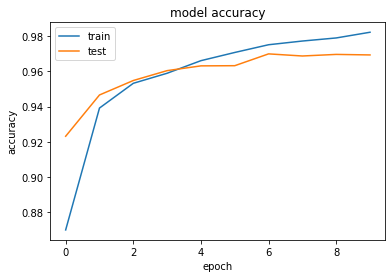

In [55]:
plot(history)